In [1]:
from __future__ import division
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
ratings_train = pd.read_csv('./homework4/data/ratings_train.csv', header=None)
ratings_test = pd.read_csv('./homework4/data/ratings_test.csv', header=None)
ratings_fake = pd.read_csv('./homework4/data/ratings_fake.csv', header=None)

In [4]:
ratings_train.columns = ['user', 'movie', 'rating']
ratings_test.columns = ['user', 'movie', 'rating']
ratings_fake.columns = ['user', 'movie', 'rating']

In [5]:
A = ratings_fake.pivot(index='user', columns='movie').as_matrix()

In [6]:
def optimize_U(U, V, B, C, mu, A):
    Us = []
    for i in range(U.shape[0]):
        right = 0
        left = 0
        for j in range(V.shape[0]):
            right += (-(B[i] + C[j] + mu - A[i, j]) * V[j])
            left += np.outer(V[j], V[j].T)
        Ui = np.dot(np.linalg.inv(left), right)
        Us.append(Ui)

    return np.array(Us)

In [7]:
def optimize_V(U, V, B, C, mu, A):
    Vs = []
    for j in range(V.shape[0]):
        rights = 0
        lefts = 0
        for i in range(U.shape[0]):
            rights += -(B[i] + C[j] + mu - A[i, j]) * U[i] 
            lefts += np.outer(U[i], U[i].T)
        Vj = np.dot(np.linalg.inv(lefts), rights)
        Vs.append(Vj)

    return np.array(Vs)

In [8]:
def optimize_B(U, V, B, C, mu, A):
    Bs = []
    for i in range(U.shape[0]):
        b = 0
        for j in range(V.shape[0]):
            b += -(np.dot(U[i], V[j]) + B[i] + C[j] + mu - A[i, j]) / V.shape[0]
        Bs.append(b)
    return np.array(Bs)

In [9]:
def optimize_C(U, V, B, C, mu, A):
    Cs = []
    for j in range(V.shape[0]):
        c = 0
        for i in range(U.shape[0]):
            c += -(np.dot(U[i], V[j]) + B[i] + C[j] + mu - A[i, j]) / U.shape[0]
        Cs.append(c)
    return np.array(Cs)

In [10]:
def update(U, V, B, C, mu, A):
    sums = 0
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            sums += -(np.dot(U[i], V[j]) + B[i] + C[j] + mu - A[i,j])
    return sums.sum()

In [11]:
def optimize_params(U, V, B, C):
    B = optimize_B(U, V, B, C, mu, A)
    U = optimize_U(U, V, B, C, mu, A)
    C = optimize_C(U, V, B, C, mu, A) 
    V = optimize_V(U, V, B, C, mu, A)
    return (B, U, C, V)

In [17]:
mu = A.mean()
m = A.shape[0]
n = A.shape[1]
k = 5
T = 20
B = np.zeros(m)
C = np.zeros(n)
U = np.random.multivariate_normal(np.zeros(k), (1/k) * np.identity(k), (m))
V = np.random.multivariate_normal(np.zeros(k), (1/k) * np.identity(k), (n))

In [18]:
for t in range(T):
    B, U, C, V = optimize_params(U, V, B, C)
    print update(U, V, B, C, mu, A)

-10.7827753521
-3783.95587834
-115.891799254
-174.769292082
-40.3676329605
-9.47186378892
-5.36013738568
-4.11921861836
-3.92279909646
-3.90534532118
-3.94236430285
-3.97853595878
-4.00678143483
-4.02672182979
-4.04043596518
-4.04977684943
-4.05614322535
-4.06049973481
-4.06349721299
-4.06557152102


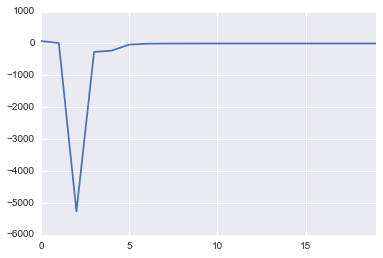

In [239]:
pd.Series(c).plot()

In [216]:
lefts = []
for j in range(V.shape[0]):
    arr = np.dot(V[j], V[j].T)
    lefts.append(arr)
lefts = np.array(lefts)
lefts = np.linalg.inv([[lefts.sum()]])

In [170]:
right = []
for i in range(U.shape[0]):
    js = []
    for j in range(V.shape[0]):
        r = (B[i] + C[j] + mu - A[i, j]) * V[j]
        js.append(r)
    right.append(np.array(js).sum(axis=0))
right = np.array(right)

In [207]:
# def non_u_component(U, B, C, mu, A):
#     new_vec = []
#     for i in range(U.shape[0]):
#         s = (B[i] + C + mu - A[i, :])
#         new_vec.append(s)
#         nuc = np.array(new_vec)
#     return nuc * V

In [166]:
# def non_v_component(U, B, C, mu, A):
#     new_vec = []
#     for i in range(V.shape[0]):
#         s = (B[i] + C + mu - A[i, :]) * V
#         new_vec.append(s)
#         nc = np.array(new_vec)
#     return nc